In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv')

In [4]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [6]:
df['f_27'].unique().size

741354

In [7]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765473,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [8]:
df.shape

(900000, 33)

In [9]:
df.drop(['f_27'] , axis = 1 , inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [11]:
temp = df[['f_00' , 'f_01', 'f_02' , 'f_03', 'f_04' , 'target']]

In [12]:
temp.head()

,f_00,f_01,f_02,f_03,f_04,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,1


<AxesSubplot:xlabel='f_00', ylabel='Count'>

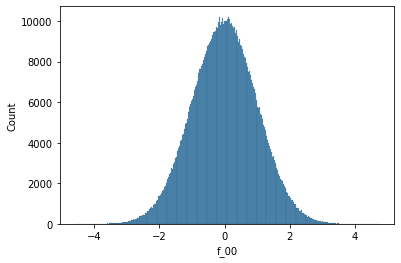

In [13]:
sns.histplot(data=temp, x="f_00")

<AxesSubplot:xlabel='f_00', ylabel='Count'>

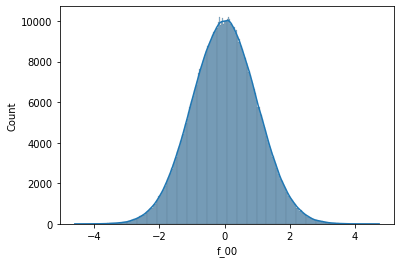

In [14]:
sns.histplot(data=temp ,x="f_00", kde=True)

<AxesSubplot:xlabel='target', ylabel='count'>

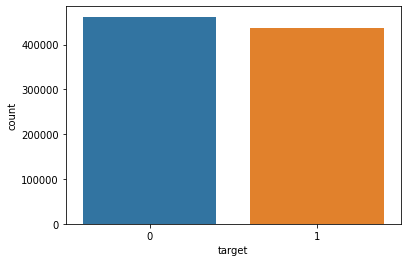

In [15]:
sns.countplot(x="target", data=temp)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(df.drop(['target'] , axis = 1) , df['target'] , test_size = 0.33 , random_state = 43)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [20]:
y_pred  = clf.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[153036,      0],
       [143964,      0]])

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_pred.size

297000

In [25]:
score = clf.score(X_test, y_test)
print(score)

0.5152727272727273


In [26]:
df_test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv')

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      700000 non-null  int64  
 1   f_00    700000 non-null  float64
 2   f_01    700000 non-null  float64
 3   f_02    700000 non-null  float64
 4   f_03    700000 non-null  float64
 5   f_04    700000 non-null  float64
 6   f_05    700000 non-null  float64
 7   f_06    700000 non-null  float64
 8   f_07    700000 non-null  int64  
 9   f_08    700000 non-null  int64  
 10  f_09    700000 non-null  int64  
 11  f_10    700000 non-null  int64  
 12  f_11    700000 non-null  int64  
 13  f_12    700000 non-null  int64  
 14  f_13    700000 non-null  int64  
 15  f_14    700000 non-null  int64  
 16  f_15    700000 non-null  int64  
 17  f_16    700000 non-null  int64  
 18  f_17    700000 non-null  int64  
 19  f_18    700000 non-null  int64  
 20  f_19    700000 non-null  float64
 21  f_20    70

In [28]:
df_test.drop(['f_27'] , axis = 1 , inplace = True)

In [29]:
df_test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415,0,2


In [30]:
op = clf.predict(df_test)

In [31]:
op

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
output = pd.DataFrame(op)

In [33]:
output.head()

,0
0,0
1,0
2,0
3,0
4,0


In [34]:
output.index.name = "id"

In [35]:
output.index += 900000

In [36]:
output.head()

,0
id,
900000,0
900001,0
900002,0
900003,0
900004,0


In [37]:
list(output)

[0]

In [38]:
output.columns = ['target']

In [39]:
output.head()

,target
id,
900000,0
900001,0
900002,0
900003,0
900004,0


In [40]:
output.shape

(700000, 1)

In [41]:
output['id'] = output.index 

In [42]:
output.head()

,target,id
id,,
900000,0,900000
900001,0,900001
900002,0,900002
900003,0,900003
900004,0,900004


In [43]:
output.drop(['id'] , axis = 1 , inplace = True)

In [44]:
output.reset_index()

,id,target
0,900000,0
1,900001,0
2,900002,0
3,900003,0
4,900004,0
...,...,...
699995,1599995,0
699996,1599996,0
699997,1599997,0
699998,1599998,0


In [45]:
output.to_csv('./submission.csv')